In [18]:
import sys
sys.path.append('src/')
import numpy as np
import matplotlib.pyplot as plt
import attitude as att

# Question 1

### Part a)

First, let us consider an infinately thin disc. The moment of inertia of a disc is

$
I = \frac{1}{2}Mr^2
$

which, for an infinately thin surface, can be written as

$
dI = \frac{1}{2}r^2 dm
$

Noting that the density of an object is

$
\rho = \frac{dm}{dV},
$

and that the volume of an infinately thin disk is

$
dV = \pi r^2 dz,
$

we can compute the differential mass as

$
dm = \rho \pi r^2 dz
$

Substituting this into the expression for $dI$, we get

$
dI = \frac{1}{2}\rho \pi r^4 dz
$

Using Pythagoras theorem, we can compute the current radius of the differential disk as

$
r^2 = R^2 - z^2
$

Substituting this into the expression for $dI$, we have

$
dI = \frac{1}{2}\rho \pi (R^2-z^2)^2dz
$

We can integrate this over all $z$ 

$
I = \int_{-R}^{+R} \frac{1}{2}\rho \pi (R^2-z^2)^2dz
$

to get

$
I = \frac{8}{15} \rho \pi R^5
$

Now, we know that density can be computed from

$
\rho = \frac{M}{V} = \frac{M}{\frac{4}{3}\pi R^3}
$

Substituting this into our final expression for $I$, we have

$
I = \frac{2}{5}MR^2
$

Normalizing this, we get

$
I/MR^2 = \frac{2}{5}
$

### Part b)

We are given the following relations for the inner layer $\rho_1, R_1$ and outer layer $\rho_2, R_2$:

$
R_2 = 2R_1
$

$
\rho_2 = \frac{1}{3}\rho_1
$

The most straightforward way to solve this problem is by overlapping two spheres of density $2\rho$ (inner sphere) and $\rho$ (outer sphere). This is equivalent since the overlapping parts of the spheres will result in a density of $3\rho$ for the interior.

$
I = \frac{16}{15}\rho \pi R_1^5 + \frac{8}{15}\rho \pi R_2^5
$

Setting $R=R_2$, we have

$
I = \frac{8}{15}\rho \pi (\frac{1}{16}R^5 + R^5) = \frac{136}{240}\rho \pi R^5 = \frac{17}{30}\rho \pi R^5
$

Now note that the mass can be computed as

$
M=2\rho\frac{4}{3}\pi(\frac{R}{2})^3+\rho\frac{4}{3}\pi R^3=\frac{5}{3}\rho \pi R^3
$

Solving for $\rho$ we get

$
\rho=\frac{3M}{5\pi R^3}
$

Subsituting this in for $\rho$ in our inertia gives us

$
I=\frac{17}{50} M R^2
$

Normalizing, we get

$
I/MR^2=\frac{17}{50}
$

which is less than the expression from part a). This makes sense since the mass is concentrated closer to the center.

### Part c)

First, let us consider an infinately thin disc with radius r. The moment of inertia of this disc is

$
I = \frac{1}{2}Mr^2
$

which, for an infinately thin surface, can be written as

$
dI = \frac{1}{2}r^2 dm
$

Noting that the density of an object is

$
\rho = \frac{dm}{dV},
$

and that the volume of an infinately thin disk is

$
dV = \pi r^2 dz,
$

we can compute the differential mass as

$
dm = \rho \pi r^2 dz
$

Substituting this into the expression for $dI$, we get

$
dI = \frac{1}{2}\rho \pi r^4 dz
$

Using Pythagoras theorem, we can compute the current radius of the differential disk as

$
r = a * \sqrt{1-\frac{z^2}{c^2}}
$

Substituting this into the expression for $dI$, we have

$
dI = \frac{1}{2}\rho \pi a^4 * (1-\frac{z^2}{c^2})^2 dz
$

We can integrate this over all $z$ 

$
I = \int_{-c}^{+c} \frac{1}{2}\rho \pi a^4 * (1-\frac{z^2}{c^2})^2 dz
$

to get

$
I = \frac{8}{15} \rho \pi a^4c
$

Now, we know that density can be computed from

$
\rho = \frac{M}{V} = \frac{M}{\frac{4}{3}\pi a^2c}
$

Substituting this into our final expression for $I$, we have

$
I = \frac{2}{5}Ma^2
$

Normalizing this, we get

$
I/Ma^2 = \frac{2}{5}
$

# Question 2

### 2a)

In this video, the orientation of the spinning body appears to chaotically flip 180 degrees. This corresponds to the spin direction also rotating 180 degrees. The reason for this is that the body is rotating about its intermediate axis, rather than its major or minor axis. This intermediate spin results in unstable rotation behavior.

### 2b)

In [19]:
rho = 2.7 * 1000
RA = 0.0025
LA = .05
RB = 0.005
LB = .1

# Function that returns the mass of a cylinder
Mcyl = lambda rho, R, L: rho*np.pi*R**2*L

# Find cylinder masses
MA = Mcyl(rho,RA,LA)
MB = Mcyl(rho,RB,LB)

# Inertia tensor for cylinder A
IA = np.array([
    [0.25*MA*RA**2 + 1./12*MA*LA**2, 0, 0],
    [0, 0.5*MA*RA**2, 0],
    [0, 0, 0.25*MA*RA**2 + 1./12*MA*LA**2]
])

# Inertia tensor for cylinder B
IB = np.array([
    [0.5*MB*RB**2, 0, 0],
    [0, 0.25*MB*RB**2 + 1./12*MB*LB**2, 0],
    [0, 0, 0.25*MB*RB**2 + 1./12*MB*LB**2]
])

# Calculate the center of mass in the y direction (symmetric in x and z)
Scm = (MA*0.5*LA + MB*(LA+RB))/(MA+MB)

# Use attitude function to translate inertia tensors to center of mass
IA_S = att.inertia_translate(MA, IA, 0, Scm - 0.5*LA, 0)
IB_S = att.inertia_translate(MB, IB, 0, Scm - (LA+RB), 0)

# Total inertia tensor
IS = IA_S + IB_S
print(IS)

[[2.94202175e-06 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.78122781e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.04809445e-05]]


We can see that the $\widehat{Y}$ direction is the intermediate axis, and that is the axis that the object is spinning about in the video. Therefore, the motion is unstable.

# Question 3

The principal moments of inertia will be the eigenvalues, and the unit vectors of the principal axes will be the eigenvectors.

In [20]:
I = np.array([
    [0.1717, 0.0, 0.0],
    [0, 0.2557, -0.04922],
    [0, -0.04922, 0.1932]
])

# Find eigenvalues and eigenvectors
(λ,V) = np.linalg.eig(I)

print(λ)
print(V)

[0.16614759 0.28275241 0.1717    ]
[[ 0.          0.          1.        ]
 [-0.4816646  -0.87635565  0.        ]
 [-0.87635565  0.4816646   0.        ]]


### 3a)

In [21]:
print("The principal moments of interia are " + str(λ))

The principal moments of interia are [0.16614759 0.28275241 0.1717    ]


### 3b)

In [22]:
print("The unit vectors are")
print(V[:,0])
print(V[:,1])
print(V[:,2])

The unit vectors are
[ 0.         -0.4816646  -0.87635565]
[ 0.         -0.87635565  0.4816646 ]
[1. 0. 0.]


### 3c)

In [23]:
print("The coordinate transform is ")
print(V)

The coordinate transform is 
[[ 0.          0.          1.        ]
 [-0.4816646  -0.87635565  0.        ]
 [-0.87635565  0.4816646   0.        ]]


Qualitatively, the figure showing the y-z plane should have one axis about 28 degrees above the positive z axis and another axis perpendicular to the first. On the figure showing the x-direction, the unit vector should just be pointed in the x-direction.

# Question 4

### 4a)

To solve this, we will use:

$\tau = I\alpha$

Since $\alpha = d\omega/dt$, we can say:

$\tau * \Delta t = I * \Delta \omega$

$\Delta t = I * \Delta \omega / \tau $

The torque is equal to the applied moment, which will be the product of the thrust and the perpendicular distance.

In [24]:
# Convert rev/min to radians
w0 = 2 * 2*np.pi / 60
wf = 10 * 2*np.pi / 60

Iz = 4000
r = 2
T = 15

# Applied moment
M = r * T

# Find time
t = Iz*(wf-w0) / M
print("Spinup time = " + str(t))



Spinup time = 111.70107212763709


### 4b)

The only thing that changes is the value of "r"

In [25]:
r = 10 + 2
M = r * T

t = Iz*(wf-w0) / M
print("Spinup time = " + str(t))

Spinup time = 18.61684535460618


### 4c)

Although this spinup is much faster, there are two negative implications of placing the thrusters at the end of solar panels. One downside is that the thrusters would excite the flex modes of the solar panels and possibly even break them. You would also need to add fuel lines that extend far beyond the fuel tanks of the spacecraft.

# Question 5

### 5a)

We are given the expression for gravity gradient torque as
$
\vec{\tau} = \frac{3\mu}{r^5}\vec{r} \times I \cdot \vec{r}
$

Let $\vec{r}$ be expressed as $x\widehat{X} + y\widehat{Y} + z\widehat{Z}$ where $\widehat{X}, \widehat{Y}, \widehat{Z}$ are expressed in the principal coordinate frame. When $z=0$, this reduces to

$
\vec{\tau} = \frac{3\mu}{r^5}(x\widehat{X} + y\widehat{Y}) \times (I_x x\widehat{X} + I_y y\widehat{Y})
$

Applying this cross product yields the relation

$
\vec{\tau} = \frac{3\mu}{r^5}(I_y-I_x)yx\widehat{Z}
$

Dotting this expression with $\widehat{Z}$ yields

$
\tau_z = \frac{3\mu}{r^5}(I_y-I_x)yx
$

### 5b)

Note that the $yx$ term is equivalent to

$
r^2\sin(\theta)\cos(\theta),
$

where $\theta$ is the angle from $\widehat{X}$ to $\vec{r}$. This term can be rewritten as

$
\frac{1}{2}r^2\sin(2\theta)
$

This term is maximized at $\theta=45^{\circ}$ for a value of $\frac{1}{2}r^2$. Therefore, the maximum gravity-gradient torque over an orbit is

$
\tau_z = \frac{3\mu}{2r^3}(I_y-I_x)
$

### 5c)

Text(0, 0.5, 'Torque [mN-m]')

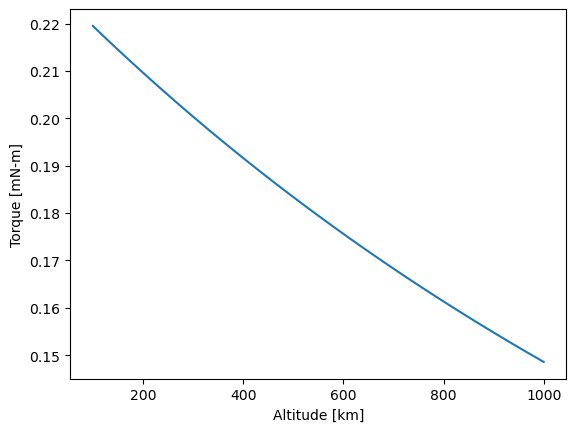

In [26]:
# Constants
mu = 3.978E14
R_earth = 6378E3
Ix = 100
Iy = 200

# Define altitude vector
alts = np.linspace(100E3,1000E3,100)

# r is measured from the center of the Earth, so we need to include Earth's radius
r = R_earth + alts
Tz = 3/2*mu/r**3*(Iy - Ix)

# Plot a figure to see when it's equal to 0.2 mN-m
plt.figure()
plt.plot(alts/1000,Tz*1000)
plt.xlabel("Altitude [km]")
plt.ylabel("Torque [mN-m]")

In [27]:
# Print altitude where torque crosses 0.2 nN-m
print("Minimum altitude = " + str(np.interp(0.2/1000,Tz[::-1],alts[::-1])) + " meters")

Minimum altitude = 304040.10011827206 meters
